# 决策树


## sk-learn 官方User Guide的例子 
DecisionTreeClassifier 是能够在数据集上执行多分类的类,与其他分类器一样，DecisionTreeClassifier 采用输入两个数组：数组X，用 [n_samples, n_features] 的方式来存放训练样本。整数值数组Y，用 [n_samples] 来保存训练样本的类标签:

In [1]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics
import matplotlib.pyplot as plt
import graphviz
from sklearn import datasets
import pandas as pd
import numpy as np
np.set_printoptions(precision=4, suppress=True, threshold=15)
pd.options.display.max_rows = 20

In [2]:
iris = datasets.load_iris()
X, y = iris.data, iris.target
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X, y)

DecisionTreeClassifier()

In [3]:
cross_val_score(dt_clf, iris.data, iris.target, cv=10)

array([1.    , 0.9333, 1.    , 0.9333, 0.9333, 0.8667, 0.9333, 1.    ,
       1.    , 1.    ])

经过训练，我们可以使用 export_graphviz 导出器以 Graphviz 格式导出决策树.

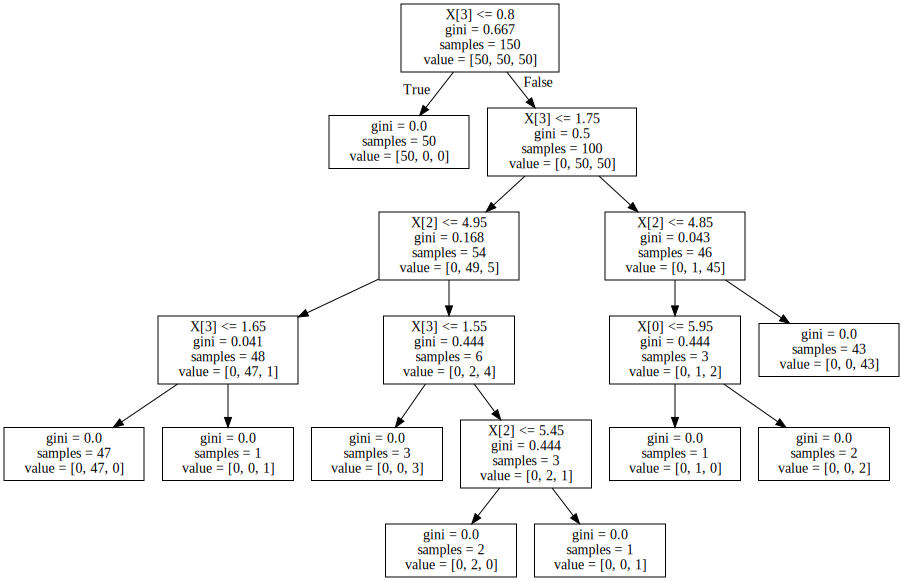

In [4]:
dot_data = export_graphviz(dt_clf, out_file=None)
graph = graphviz.Source(dot_data)
graph
# graph.render("iris", format='png')  保存成其他格式

export_graphviz 还支持各种美化，包括通过他们的类着色节点（或回归值），如果需要，还能使用显式变量和类名

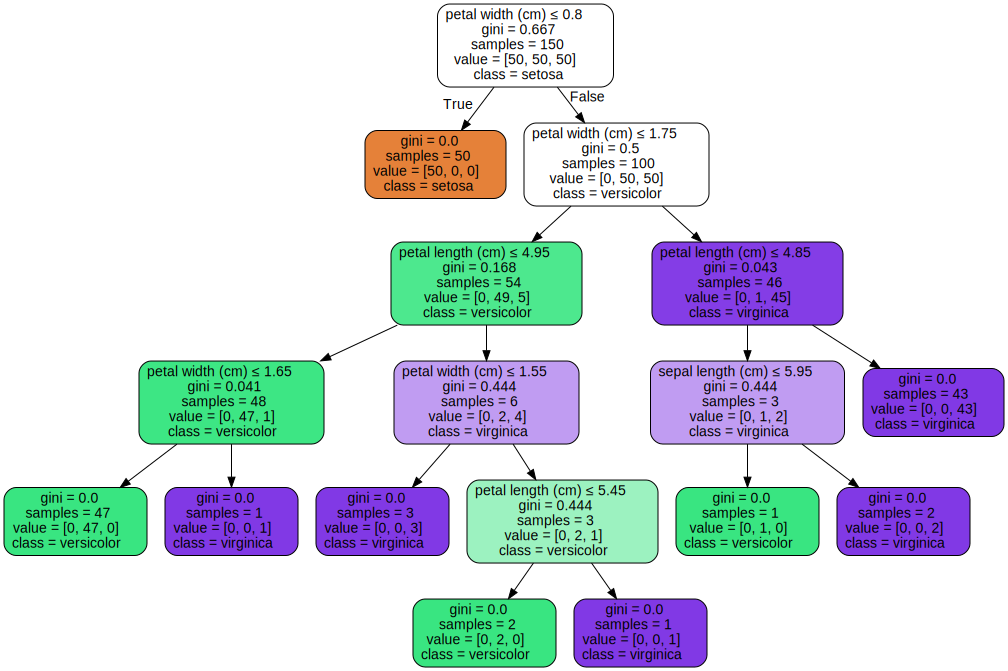

In [5]:
dot_data = export_graphviz(dt_clf, out_file=None,
                        feature_names=iris.feature_names,
                        class_names=iris.target_names,
                        filled=True, rounded=True,
                        special_characters=True  # 忽略特殊字符
                        )
graph = graphviz.Source(dot_data)
graph

[实用技巧](https://github.com/apachecn/sklearn-doc-zh/blob/master/docs/0.21.3/11.md#1105-%E5%AE%9E%E9%99%85%E4%BD%BF%E7%94%A8%E6%8A%80%E5%B7%A7)

## [sklearn-cookbook 例子](https://github.com/apachecn/sklearn-cookbook-zh/blob/master/4.md#41-%E4%BD%BF%E7%94%A8%E5%86%B3%E7%AD%96%E6%A0%91%E5%AE%9E%E7%8E%B0%E5%9F%BA%E6%9C%AC%E7%9A%84%E5%88%86%E7%B1%BB)

In [6]:
# 生成n-class(默认2个)的样本
# 3特征 其中0冗余 0重复
X, y = datasets.make_classification(n_samples=1000, n_features=3, n_redundant=0)
X

array([[ 1.0051,  0.6164, -1.2172],
       [-0.8187, -0.5985, -1.3213],
       [ 0.8177,  0.8122, -1.1047],
       ...,
       [ 1.2935, -0.6195,  0.2408],
       [-1.0228, -1.949 , -1.2135],
       [-1.5044,  0.8424,  1.2817]])

In [7]:
dt = DecisionTreeClassifier()
dt.fit(X, y)

DecisionTreeClassifier()

In [8]:
preds = dt.predict(X)
np.mean(preds == y)

1.0

**max_depth** 决策树最大深度, 决定了分支的数量

In [9]:
n_features = 200
X, y = datasets.make_classification(1000, n_features=n_features, n_informative=5)  # 有用的特征数5个
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
accuracies = [] # 保存正确率

In [10]:
# 不同的最大深度 的影响
for x in range(1, n_features+1):
    dt_clf = DecisionTreeClassifier(max_depth=x)
    dt_clf.fit(X_train, y_train)
    score = dt_clf.score(X_test, y_test)
    accuracies.append(score)

In [11]:
np.argmax(accuracies) + 1

78

In [12]:
# 可视化处理
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Score')

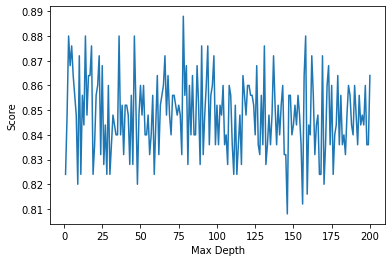

In [13]:
plt.plot(range(1, n_features+1), accuracies)
plt.xlabel('Max Depth')
plt.ylabel('Score')

实际上在较低最大深度处得到了漂亮的准确率.

Text(0, 0.5, 'Score')

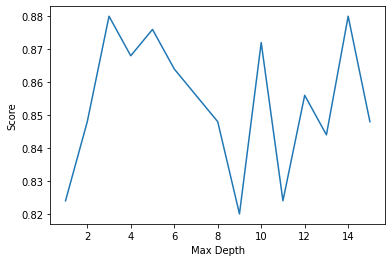

In [14]:
N = 15
plt.plot(range(1, n_features+1)[:N], accuracies[:N])
plt.xlabel('Max Depth')
plt.ylabel('Score')

**调整决策树模型**

In [15]:
X, y = datasets.make_classification(1000, n_features=20, n_informative=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
def dt_max_depth(*args, **kwargs):
    dt = DecisionTreeClassifier(*args, **kwargs)
    dt.fit(X_train, y_train)
    return dt

In [16]:
def view_dt(dt):
    dot_data = export_graphviz(dt, out_file=None)
    graph = graphviz.Source(dot_data)
    return graph

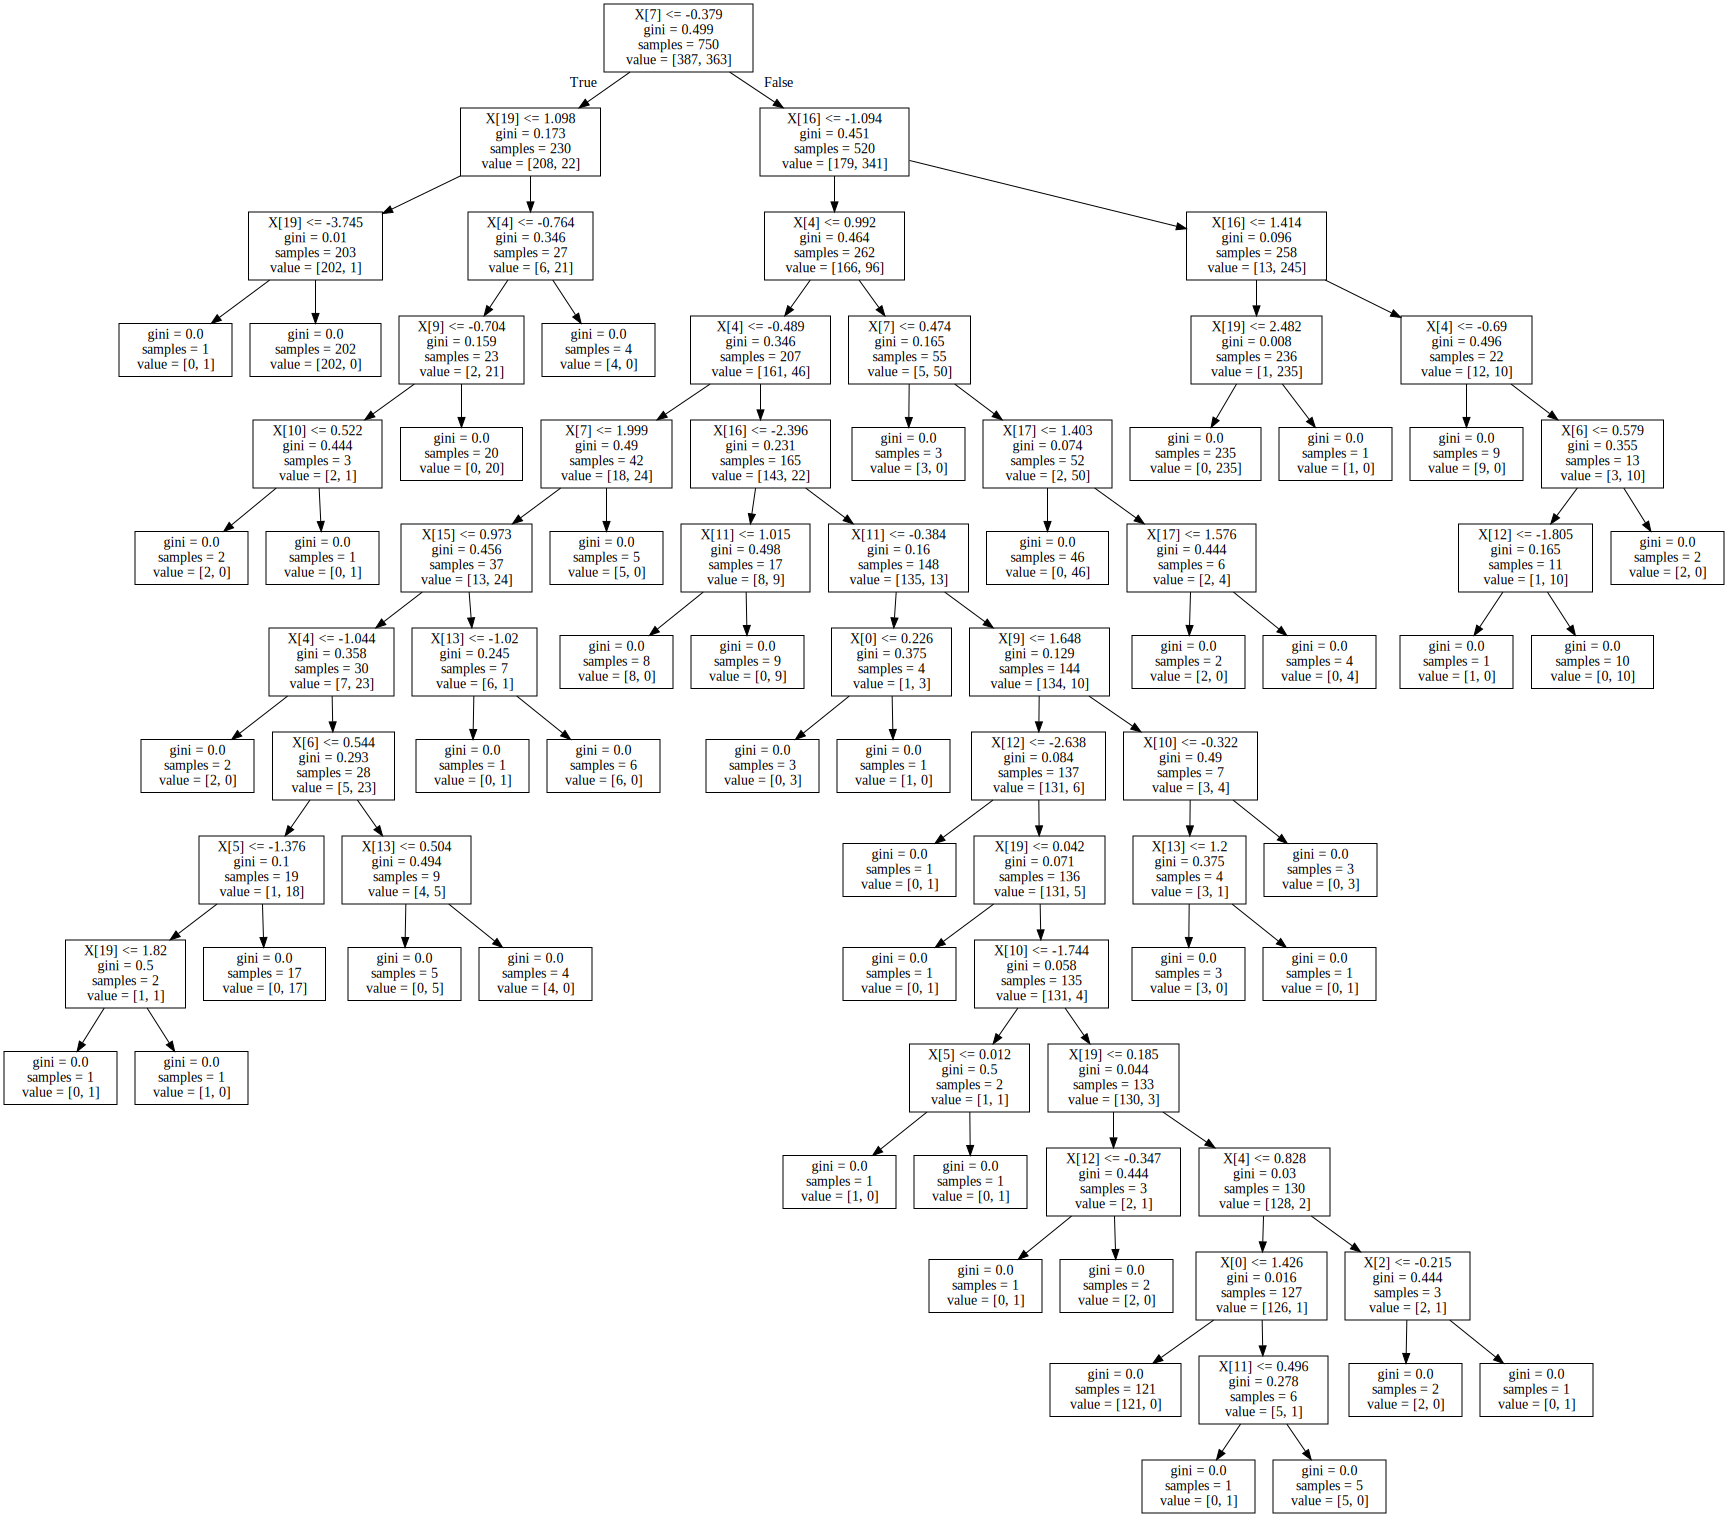

In [17]:
view_dt(dt_max_depth())  # 10层 

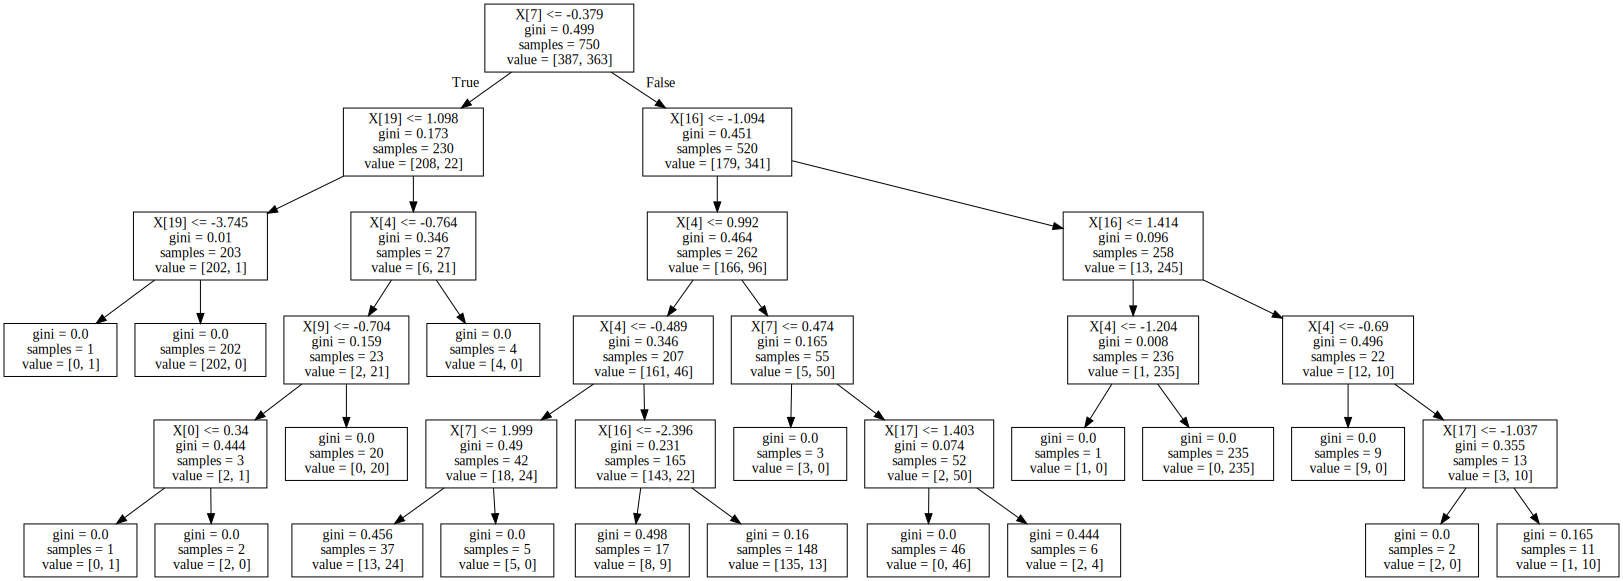

In [18]:
# 降低最大深度
view_dt(dt_max_depth(max_depth=5)) 

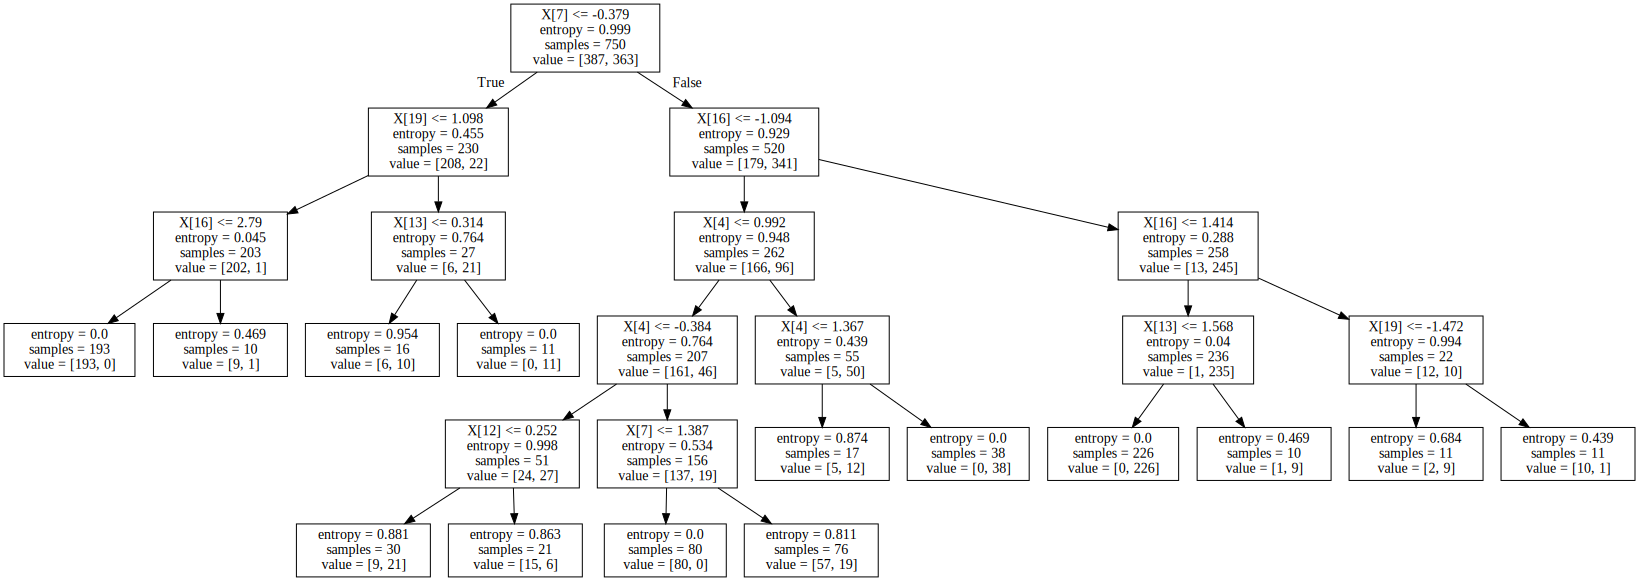

In [19]:
# 使用信息增益(熵)进行分割
view_dt(dt_max_depth(max_depth=5, criterion='entropy', min_samples_leaf=10))   # 叶结点最小样本数10

##  用决策树解释泰坦尼克号假设
[sklearn 学习指南](https://github.com/apachecn/misc-docs-zh/blob/master/docs/learning-sklearn/ch02.md#%E7%94%A8%E5%86%B3%E7%AD%96%E6%A0%91%E8%A7%A3%E9%87%8A%E6%B3%B0%E5%9D%A6%E5%B0%BC%E5%85%8B%E5%8F%B7%E5%81%87%E8%AE%BE)

属性列表为：Ordinal（序号），Class（等级），Survived（是否幸存，0=no，1=yes），Name（名称），Age（年龄），Port of Embarkation（登船港口），Home/Destination（家/目的地），Room（房间），Ticket（票号），Boat（救生艇）和Sex（性别）

In [ ]:
import numpy as np
import pandas as pd

In [20]:
data = pd.read_csv('titanic')
data

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female
1,2,1st,0,"Allison, Miss Helen Loraine",2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,(135),male
3,4,1st,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
4,5,1st,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male
...,...,...,...,...,...,...,...,...,...,...,...
1308,1309,3rd,0,"Zakarian, Mr Artun",NaN,NaN,NaN,NaN,NaN,NaN,male
1309,1310,3rd,0,"Zakarian, Mr Maprieder",NaN,NaN,NaN,NaN,NaN,NaN,male
1310,1311,3rd,0,"Zenn, Mr Philip",NaN,NaN,NaN,NaN,NaN,NaN,male
1311,1312,3rd,0,"Zievens, Rene",NaN,NaN,NaN,NaN,NaN,NaN,female


### 预处理数据   
选择 pclass age sex 这3种数据进行划分

In [21]:
titanic_X , titanic_y = data.iloc[:, [1, 4, -1]], data.iloc[:, 2]
features = titanic_X.columns
features

Index(['pclass', 'age', 'sex'], dtype='object')

In [22]:
titanic_y.value_counts()

0    864
1    449
Name: survived, dtype: int64

**处理缺失值**

将年龄的缺失值用所有人员年龄的平均值进行替换

In [23]:
titanic_X = titanic_X.fillna(titanic_X.mean())
X = titanic_X.values  # pandas -> array
X

array([['1st', 29.0, 'female'],
       ['1st', 2.0, 'female'],
       ['1st', 30.0, 'male'],
       ...,
       ['3rd', 31.19418104265403, 'male'],
       ['3rd', 31.19418104265403, 'female'],
       ['3rd', 31.19418104265403, 'male']], dtype=object)

In [24]:
y = titanic_y.values
y

array([1, 0, 0, ..., 0, 0, 0])

**类别特征编码**  
将标签值转为0..K-1的整数
```
class sklearn.preprocessing.LabelEncoder
    Encode labels with value between 0 and nclasses
```

In [25]:
from sklearn import preprocessing
enc = preprocessing.LabelEncoder()
X[:, -1] = enc.fit_transform(X[:, -1])  # 直接对 性别 这一列进行转换
X

array([['1st', 29.0, 0],
       ['1st', 2.0, 0],
       ['1st', 30.0, 1],
       ...,
       ['3rd', 31.19418104265403, 1],
       ['3rd', 31.19418104265403, 0],
       ['3rd', 31.19418104265403, 1]], dtype=object)

In [26]:
enc.classes_ 

array(['female', 'male'], dtype=object)

对 pclass 进行这样处理,会有3个结果 0, 1, 2.这种转换隐式地引入了类之间的顺序, 但实际却是无序的.  
另外一种将标称型特征转换为能够被scikit-learn中模型使用的编码是one-of-K， 又称为**独热码**或dummy encoding。  
这种编码类型已经在类`OneHotEncoder`中实现。该类把每一个具有n_categories个可能取值的categorical特征变换为长度为n_categories的二进制特征向量，里面只有一个地方是1，其余位置都是0.  
1st 2nd 3rd 

In [27]:
# 将整数特征 变 独热码
enc_pclass = preprocessing.OneHotEncoder()
enc_pclass

OneHotEncoder()

In [28]:
new_pclass = enc_pclass.fit_transform(X[:,0][:, np.newaxis]).toarray()
new_pclass  # 将pclass列 n个数据变成 n个特征向量, 每个向量中只有一个为1 其余为0

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [29]:
X

array([['1st', 29.0, 0],
       ['1st', 2.0, 0],
       ['1st', 30.0, 1],
       ...,
       ['3rd', 31.19418104265403, 1],
       ['3rd', 31.19418104265403, 0],
       ['3rd', 31.19418104265403, 1]], dtype=object)

In [30]:
X = np.concatenate((new_pclass, X[:, 1:]), axis=1)  # 最终得到的数据
X

array([[1.0, 0.0, 0.0, 29.0, 0],
       [1.0, 0.0, 0.0, 2.0, 0],
       [1.0, 0.0, 0.0, 30.0, 1],
       ...,
       [0.0, 0.0, 1.0, 31.19418104265403, 1],
       [0.0, 0.0, 1.0, 31.19418104265403, 0],
       [0.0, 0.0, 1.0, 31.19418104265403, 1]], dtype=object)

In [31]:
enc_pclass.get_feature_names()

array(['x0_1st', 'x0_2nd', 'x0_3rd'], dtype=object)

In [32]:
enc_pclass.categories_[0]

array(['1st', '2nd', '3rd'], dtype=object)

In [33]:
new_features = np.append(enc_pclass.categories_[0], np.array(features[1:]))
new_features

array(['1st', '2nd', '3rd', 'age', 'sex'], dtype=object)

### 训练决策树

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12345)

In [35]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5)

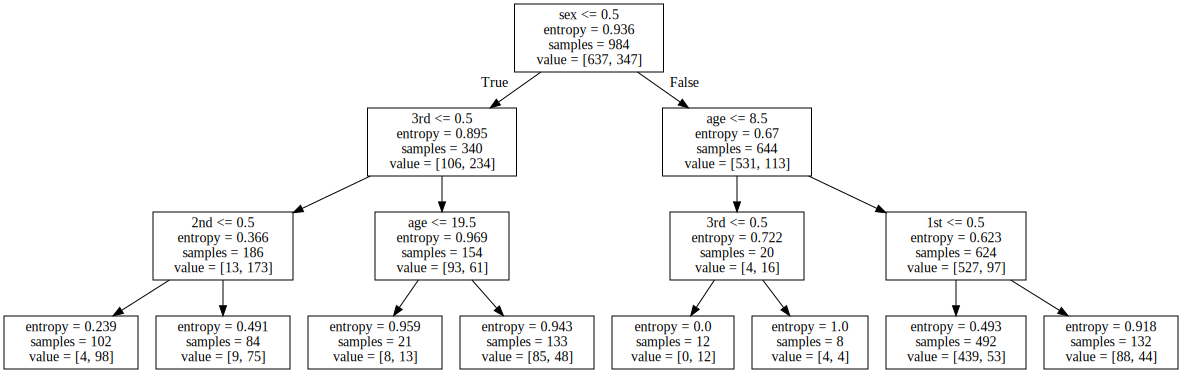

In [36]:
dot_data = export_graphviz(dt, out_file=None, feature_names=new_features)
graphviz.Source(dot_data)

### 评估分类器

In [37]:
def measure_performance(X, y, clf):
    y_pred = dt.predict(X)
    print(f"Accuracy: {metrics.accuracy_score(y, y_pred):.3f}")  #  精确度得分
    print('Classification report: ')
    print(metrics.classification_report(y, y_pred))  # 具体的分类指标
    print("Confussion matrix")
    """ 从混淆矩阵的迹除以总和来计算准确度
    TN(真阴)  FP(假阳)
    FN(假阴)  TP(真阳)
    """
    print(metrics.confusion_matrix(y, y_pred))

In [38]:
measure_performance(X_train, y_train, dt)

Accuracy: 0.827
Classification report: 
              precision    recall  f1-score   support

           0       0.81      0.97      0.88       637
           1       0.90      0.57      0.70       347

    accuracy                           0.83       984
   macro avg       0.85      0.77      0.79       984
weighted avg       0.84      0.83      0.82       984

Confussion matrix
[[616  21]
 [149 198]]


In [39]:
measure_performance(X_test, y_test, dt)

Accuracy: 0.830
Classification report: 
              precision    recall  f1-score   support

           0       0.83      0.94      0.88       227
           1       0.82      0.58      0.68       102

    accuracy                           0.83       329
   macro avg       0.83      0.76      0.78       329
weighted avg       0.83      0.83      0.82       329

Confussion matrix
[[214  13]
 [ 43  59]]


**留一交叉验证(LeaveOneOut, LOO)**  
每个学习集都是通过除了一个样本以外的所有样本创建的，测试集是被留下的样本。 因此，对于 n 个样本，我们有 n 个不同的训练集和 n 个不同的测试集

In [ ]:
from sklearn.model_selection import LeaveOneOut
from scipy.stats import sem   # 计算平均值的标准误差
def loo_cv(X, y, clf):
    scores = np.zeros(X.shape[0])
    loo = LeaveOneOut()
    # test_index 长度为1
    for train_index, test_index in loo.split(X):  # [1, 2, 3,...] [0]
        # print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf = clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        scores[test_index] = metrics.accuracy_score(y_test, y_pred)
    print(f"Mean score: {np.mean(scores):.3f}(+/-{sem(scores):.3f})")

In [ ]:
loo_cv(X_train, y_train, dt)

留一法交叉验证的主要优点是它允许训练的数据几乎与我们可用的数据一样多，因此它特别适用于数据稀缺的情况。其主要问题是，就计算时间而言，为每个实例训练不同的分类器可能是非常昂贵的。

In [ ]:

rf_clf = RandomForestClassifier(n_estimators=10, random_state=33, n_jobs=-1)
rf_clf.fit(X_train, y_train)

In [ ]:
rf_clf.n_features_  # The number of features when fit is performed.

In [ ]:
measure_performance(X_train, y_train, rf_clf)

In [ ]:
measure_performance(X_test, y_test, rf_clf)

In [ ]:
loo_cv(X_train, y_train, rf_clf)

随机森林的结果实际上更糟。毕竟，引入随机化似乎不是一个好主意，因为特征数量太少。然而，对于具有更多特征的更大数据集，随机森林是一种非常快速，简单且流行的方法，可以提高准确率，保留决策树的优点